In [21]:
from AdaBoost import AdaBoost
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

$w_i^{(t)}$ : `sample_weights` with shape(T, n)

$h_t{(x)}$ : `stumps` with shape(T,)

$\alpha_t$ :`stump_weights` with shape(T, )

$\epsilon_t$: `errors` with shape (T, )

$H_t(x)$ : `clf.predict(x)`


### The AdaBoost algorithm: 

A) Initialize sample weights uniformly as $w_i^{(1)} = \frac{1}{n}$

B) For each iteration $t$:

- 1) Find weak learner $h_t(x)$  which minimizes $\epsilon_t = \sum_{i=1}^n1[h_t(x_i)\ne y_i]w_i(t)$

- 2) We set a weight for our weak learner based on its accuracy: $\alpha_t = \frac{1}{2} ln( \frac{1-\epsilon_t}{\epsilon_t})$

- 3) Increase weights of misclassified observations: $w_i^{(t+1)} = w_i^{(t)}. e^{-\alpha_ty_ih_t(x_i)}$

- 4) Renormalize weights, so that $\sum_{i=1}^n w_i^{(t+1)} = 1$

C) Make final prediction as weighted majority vote of weak learner predictions: $H(x) = sign(\sum_{t=1}^T \alpha
_th_t(x))$

In [22]:
## convert text file into matrix
def file2matrix(filename , header = True, delimeter="\t", index_y = None):
    """
    Takes a .txt file and returns a list of column names,a matrix of features and
    a vectore of y in case of having a target variable.
    """    
    fr = open(filename)
    colName = []
    if header == True:
        colName = list(fr.readline().strip().split(delimeter))
    numberOfLines = len(fr.readlines())
    fr = open(filename)
    numberOfX = len(fr.readline().split(delimeter)) 
    if index_y is not None:
        numberOfX = len(fr.readline().split(delimeter))-1                   
    returnMatX = np.zeros((numberOfLines,numberOfX))
    classLabelVector = []
    fr = open(filename)
    firstRow = 0
    if header == True:
        firstRow = 1
    index = 0
    for line in fr.readlines()[firstRow:]:
        line = line.strip()                            
        listFromLine = line.split(delimeter)
        if index_y is not None:
            classLabelVector.append(listFromLine[index_y])
            listFromLine.pop(index_y)
        fltListFromLine = list(map(lambda x: float(x) if x!="" else np.nan, listFromLine))                                 
        returnMatX[index,:] = fltListFromLine        
        index += 1
    return colName, returnMatX, classLabelVector

In [23]:
## confusion matrix plot
def plot_cm(y, y_est):
    cm = confusion_matrix(y, y_est);
    accuracy = np.round(100*cm.diagonal().sum() / cm.sum(),2); error_rate = np.round(100-accuracy,2)
    plt.imshow(cm, cmap='binary', interpolation='None')
    plt.colorbar()
    #plt.xticks(range(C)); plt.yticks(range(C));
    plt.xlabel('Predicted class'); plt.ylabel('Actual class');
    plt.title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

In [24]:
filename = "datingTestSet.txt"
colName, returnMatX, classLabelVector = file2matrix(filename, header = False, index_y = -1)

numericClass = []
for x in classLabelVector:
    if x == 'largeDoses':
        numericClass.append(0)
    elif x== 'smallDoses':
        numericClass.append(1)
    else:
        numericClass.append(2)

Training accuracy: 98.06


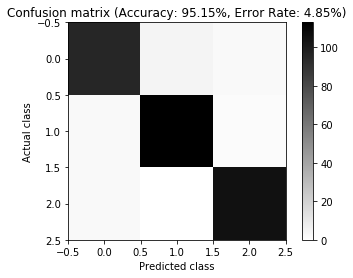

In [39]:
X = returnMatX
y = np.array(numericClass)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = AdaBoost(classifier = "DecisionTree")
model.fit(X_train,y_train,100)
print("Training accuracy: %.2f"%(model.score()*100))

pred = model.prediction(X_test)
plot_cm(y_test,pred)